### 회귀 (Regression)
- 데이터가 평균과 같은 '일정한 값' 으로 돌아가려는 경향을 이용한 통계학 기법이다.
- 여러 개의 독립 변수와 한 개의 종속 변수 간의 상관관계를 모델링하는 기법을 통칭한다.
> - 어느 정도의 상관관계가 있어야 모델링이 가능하다.
- feature와 target 데이터 기반으로 학습하여 최적의 회귀 계수(W)를 찾는 것이 회귀의 목적이다.
- 아래는 복습 시간에 따른 다음 수업의 이해도를 수치로 표현한 표이다.

---
<div style="display: flex; justify-content: center; width: 900px;">
    <table style="margin-left: 20px; text-align: center; border: 1px solid #eee; width: 500px;">
        <tr>
            <th>복습 시간 (x)</th>
            <th>다음 수업의 이해도 (y)</th>
        </tr>
        <tr>
            <td>1</td>
            <td>2.2</td>
        </tr>
        <tr>
            <td>2</td>
            <td>5.8</td>
        </tr>
        <tr>
            <td>3</td>
            <td>7.6</td>
        </tr>
        <tr>
            <td>4</td>
            <td>9.3</td>
        </tr>
    </table>  
    <div style="margin-top: 60px;">
        <img src="./images/regression_train.png">
    </div>
</div>  

---


- 5시간 동안 복습을 했을 때, 다음 수업의 이해도를 예측하고자 한다면  
**학습 데이터(x)를 '가장 잘 표현할 수 있는 직선' 을 찾아야 하고, 이 식을 회귀 분석에서는 가설(Hypothesis)라고 한다.**
- 아래는 위 데이터를 표현하고자 하는 직선의 방정식과 가설이다.

<img src="./images/regression_h.png" style="margin-left: 20px;">

- 수학에서는 W는 기울기, b는 절편이라고 하지만, 가설에서는 W(Weight)는 가중치, b(bias)는 편향이라 한다.
- 편향은 다양한 요인을 대표하는 값이다.

In [1]:
import torch

print(torch.__version__)

2.3.0


In [2]:
import numpy as np

print(torch.FloatTensor(np.array([1, 2, 3, 4])).dim())
print(torch.FloatTensor([1, 2, 3, 4]).shape)
print(torch.FloatTensor([1, 2, 3, 4]).unsqueeze(1))
print(torch.FloatTensor([1, 2, 3, 4]).view(-1, 1))

1
torch.Size([4])
tensor([[1.],
        [2.],
        [3.],
        [4.]])
tensor([[1.],
        [2.],
        [3.],
        [4.]])


In [3]:
X_train = torch.FloatTensor(np.array([1, 2, 3, 4])).view(-1, 1)
y_train = torch.FloatTensor(np.array([2.2, 5.8, 7.6, 9.3])).view(-1, 1)

print(X_train, y_train, sep='\n')

tensor([[1.],
        [2.],
        [3.],
        [4.]])
tensor([[2.2000],
        [5.8000],
        [7.6000],
        [9.3000]])


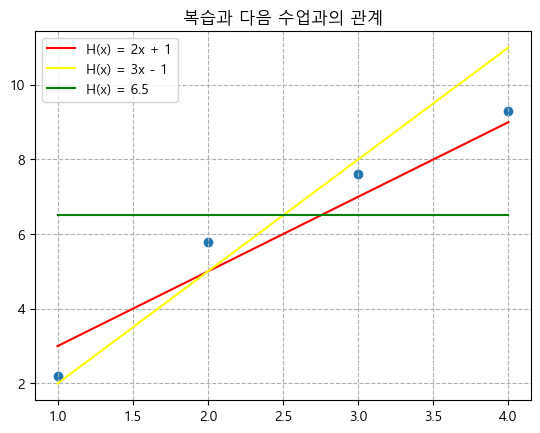

In [4]:
import matplotlib.pyplot as plt


# 폰트를 맑은 고딕으로 설정하고 한글 깨짐 방지
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

plt.scatter(X_train, y_train)
plt.plot(X_train, 2 * X_train + 1, color='red', label='H(x) = 2x + 1')
plt.plot(X_train, 3 * X_train - 1, color='yellow', label='H(x) = 3x - 1')
plt.plot(X_train, 0 * X_train + 6.5, color='green', label='H(x) = 6.5')
plt.grid(visible=True, linestyle='--')
plt.title('복습과 다음 수업과의 관계')
plt.legend()
plt.show()

- 위 3개의 직선 중에서 데이터를 가장 잘 표현한 직선을 고르고자 한다면, 오차(error)를 구해봐야 한다.

<table style="margin-left: 20px; text-align: center; border: 1px solid red; width: 700px; margin-bottom: 50px;">
    <caption style="font-weight: bold">H(x) = 2x + 1</caption>
    <tr>
        <th>X</th>
        <th>1</th>
        <th>2</th>
        <th>3</th>
        <th>4</th>
    </tr>
    <tr>
        <td>Y</td>
        <td>2.2</td>
        <td>5.8</td>
        <td>7.6</td>
        <td>9.3</td>
    </tr>
    <tr>
        <td>H(x)</td>
        <td>3</td>
        <td>5</td>
        <td>7</td>
        <td>9</td>
    </tr>
    <tr style="font-weight: bold">
        <td>E</td>
        <td>-0.8</td>
        <td>0.8</td>
        <td>0.6</td>
        <td>0.3</td>
    </tr>
</table>

<table style="margin-left: 20px; text-align: center; border: 1px solid blue; width: 700px; margin-bottom: 50px;">
    <caption style="font-weight: bold">H(x) = 3x - 1</caption>
    <tr>
        <th>X</th>
        <th>1</th>
        <th>2</th>
        <th>3</th>
        <th>4</th>
    </tr>
    <tr>
        <td>Y</td>
        <td>2.2</td>
        <td>5.8</td>
        <td>7.6</td>
        <td>9.3</td>
    </tr>
    <tr>
        <td>H(x)</td>
        <td>2</td>
        <td>5</td>
        <td>8</td>
        <td>11</td>
    </tr>
    <tr style="font-weight: bold">
        <td>E</td>
        <td>0.2</td>
        <td>0.8</td>
        <td>-0.4</td>
        <td>-1.7</td>
    </tr>
</table>

<table style="margin-left: 20px; text-align: center; border: 1px solid green; width: 700px;">
    <caption style="font-weight: bold">H(x) = 6.5</caption>
    <tr>
        <th>X</th>
        <th>1</th>
        <th>2</th>
        <th>3</th>
        <th>4</th>
    </tr>
    <tr>
        <td>Y</td>
        <td>2.2</td>
        <td>5.8</td>
        <td>7.6</td>
        <td>9.3</td>
    </tr>
    <tr>
        <td>H(x)</td>
        <td>6.5</td>
        <td>6.5</td>
        <td>6.5</td>
        <td>6.5</td>
    </tr>
    <tr style="font-weight: bold">
        <td>E</td>
        <td>-4.3</td>
        <td>-0.7</td>
        <td>1.1</td>
        <td>2.8</td>
    </tr>
</table>

---  

- E = Y - H(x)로 계산하면 E의 값이 음수가 될 수 있기 때문에 전체 오차의 크기를 측정할 수 없다.
- 따라서 **각 오차에 제곱을 한 뒤 더하고 평균**을 구한다.
- 이를 **"평균 제곱 오차(MSE)"** 라고 한다.

<img src='./images/regression_e.png' style='margin-left: 20px;'>

- 이 떄, 오차를 구해주는 함수로 표현하면 아래와 같이 손실 함수(loss function)로 표현된다.

<img src='./images/regression_loss_function01.png' style='margin-left: 20px;'>

- 즉, 손실 함수가 최소가 되는 시점의 W와 b를 구함으로서 훈련 데이터를 가장 잘 나타내는 직선을 구할 수 있다.

<img src='./images/regression_loss_function02.png' style='margin-left: 20px;'>

### 최적화 (Optimizer) - 경사 하강법 (Gradient Descent)
<sub>아래의 설명부터는 이해를 위해 W를 가중치가 이닌 기울기, bias를 절편, 0으로 가정한다.</sub>

- 손실 함수의 값을 최소로 하는 기울기와 절편을 찾기 위해서 최적화(Optimization) 알고리즘이 사용된다.
- 기울기(W)와 오차의 관계를 그래프로 나타내기 위해서는 패턴을 알아야 한다. 그 패턴은 다음과 같다.
- 기울기(W)가 지나치게 크거나 작아지면 오차가 커지기 때문에, 적절한 기울기를 찾아야 한다.

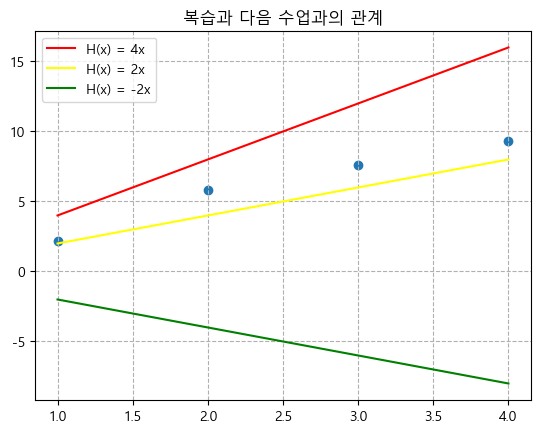

In [5]:
import matplotlib.pyplot as plt


# 폰트를 맑은 고딕으로 설정하고 한글 깨짐 방지
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

plt.scatter(X_train, y_train)
plt.plot(X_train, 4 * X_train, color='red', label='H(x) = 4x')
plt.plot(X_train, 2 * X_train, color='yellow', label='H(x) = 2x')
plt.plot(X_train, -2 * X_train, color='green', label='H(x) = -2x')
plt.grid(visible=True, linestyle='--')
plt.title('복습과 다음 수업과의 관계')
plt.legend()
plt.show()

- 따라서 기울기와 오차는 기울기가 커질수록 Loss 값도 커지고,  
  지나치게 작아져도 Loss 값은 계속 커지기 때문에 아래와 같은 관계 그래프가 나온다.

<img src="./images/gradient_descent01.png" style="margin-left: 20px;">

- 위 그래프에서 Loss 값이 최소가 되는 W를 찾아야 한다.
- 임의의 초기값 W를 정한 뒤, 점차 W를 수정해야 하는데,
  이를 경사 하강법(Gradient Descent)으로 진행할 수 있다.

<img src="./images/gradient_descent02.png" style="margin-left: 20px;">

- W가 아래로 내려갈 수록 접선의 기울기도 작아지고,  
  결국 Loss가 최소가 되는 지점은 접선의 기울기가 0이 된다.
- 즉, Loss 값이 최소가 되는 지점은 미분값이 0이다.
- 기존 W에 경사 하강법 알고리즘에 대한 값을 빼주면서 점점 업데이트 되며, 이를 아래 수식으로 표현 가능하다.

<img src="./images/gradient_descent03.png" style="margin-left: 20px;">

- 빼줄 값에 η(에타)를 곱해줄 수 있는데, 이 η가 바로 학습률(Learning Rate)이다.
- 학습률로 하강 속도를 줄일 수 있으며, 이 수치를 너무 크게 주면 발산하고  
  너무 작게 주면 최소값에 도달하지 못할 수 있다.

<img src="./images/learning_rate.png" style="margin-left: -70px;">

In [6]:
X_train = torch.FloatTensor(np.array([1, 2, 3, 4])).view(-1, 1)
y_train = torch.FloatTensor(np.array([2.2, 5.8, 7.6, 9.3])).view(-1, 1)

print(X_train.shape, y_train.shape, sep='\n')

torch.Size([4, 1])
torch.Size([4, 1])


In [9]:
# 가중치 초기화
W = torch.zeros(1, requires_grad=True)

# 편향 초기화
b = torch.zeros(1, requires_grad=True)

print(W, b)

tensor([0.], requires_grad=True) tensor([0.], requires_grad=True)


In [10]:
# 가설 선언
H = W * X_train + b

print(H.shape)

torch.Size([4, 1])


In [11]:
# 손실 함수 선언 (MSE)
loss = torch.mean((y_train - H) ** 2)

print(loss)

tensor(45.6825, grad_fn=<MeanBackward0>)


In [14]:
import torch
from torch.optim import SGD

torch.manual_seed(124)

# 훈련 데이터
X_train = torch.FloatTensor(np.array([1, 2, 3, 4])).view(-1, 1)
y_train = torch.FloatTensor(np.array([2.2, 5.8, 7.6, 9.3])).view(-1, 1)

# 가중치 초기화
W = torch.zeros(1, requires_grad=True)

# 편향 초기화
b = torch.zeros(1, requires_grad=True)

# 경사 하강법
optimizer = SGD([W, b], lr=0.01)

# 반복 횟수
epochs = 1200

for epoch in range(1, epochs + 1):
    # 매 반복마다 새 가설 선언
    H = W * X_train + b

    # 손실 함수
    loss = torch.mean((y_train - H) ** 2)

    # 다음 기울기를 위해 기존 기울기 초기화
    optimizer.zero_grad()

    # 손실 함수 미분 후 기울기 계산
    loss.backward()

    # W, b 값 업데이트
    optimizer.step()
    
    # epoch 100번마다 출력
    if epoch % 100 == 0:
        print('{:4d}/{}: W: {:.4f}, b: {:.4f}, loss: {:.4f}'.format(epoch, epochs, W.item(), b.item(), loss.item()))

 100/1200: W: 2.2342, b: 0.6729, loss: 0.2701
 200/1200: W: 2.2538, b: 0.6152, loss: 0.2663
 300/1200: W: 2.2684, b: 0.5724, loss: 0.2643
 400/1200: W: 2.2792, b: 0.5407, loss: 0.2631
 500/1200: W: 2.2871, b: 0.5172, loss: 0.2625
 600/1200: W: 2.2931, b: 0.4998, loss: 0.2622
 700/1200: W: 2.2975, b: 0.4869, loss: 0.2620
 800/1200: W: 2.3007, b: 0.4773, loss: 0.2619
 900/1200: W: 2.3031, b: 0.4703, loss: 0.2618
1000/1200: W: 2.3049, b: 0.4650, loss: 0.2618
1100/1200: W: 2.3062, b: 0.4611, loss: 0.2618
1200/1200: W: 2.3072, b: 0.4582, loss: 0.2618


In [24]:
print(y_train)

print('=' * 40)

print(('정답', '예측'))
for eval in zip(y_train, 2.3072 * X_train + 0.4582):
    print(eval)

tensor([[2.2000],
        [5.8000],
        [7.6000],
        [9.3000]])
('정답', '예측')
(tensor([2.2000]), tensor([2.7654]))
(tensor([5.8000]), tensor([5.0726]))
(tensor([7.6000]), tensor([7.3798]))
(tensor([9.3000]), tensor([9.6870]))


In [31]:
import torch
from torch.nn import Linear
from torch.nn.functional import mse_loss
from torch.optim import SGD

torch.manual_seed(124)

# 훈련 데이터
X_train = torch.FloatTensor(np.array([1, 2, 3, 4])).view(-1, 1)
y_train = torch.FloatTensor(np.array([2.2, 5.8, 7.6, 9.3])).view(-1, 1)

# 선형 회귀 모델
# Linear(input dimension, output dimention)
l_r = Linear(1, 1)

# Linear 객체는 초기화한 W와 b를 가지고 있고, 이를 parameters()로 가져온다.
optimizer = SGD(l_r.parameters(), lr=0.01)

epochs = 1200

for epoch in range(1, epochs + 1):
    H = l_r(X_train)

    loss = mse_loss(H, y_train)

    optimizer.zero_grad()

    # 손실 함수 미분 후 기울기 계산
    loss.backward()

    # W, b 값 업데이트
    optimizer.step()

    # epoch 100번마다 출력
    if epoch % 100 == 0:
        W = list(l_r.parameters())[0].item()
        b = list(l_r.parameters())[1].item()
        print('{:4d}/{}: W: {:.4f}, b: {:.4f}, loss: {:.4f}' \
              .format(epoch, epochs, W, b, loss.item()))

 100/1200: W: 2.1216, b: 1.0041, loss: 0.3133
 200/1200: W: 2.1704, b: 0.8605, loss: 0.2901
 300/1200: W: 2.2065, b: 0.7542, loss: 0.2773
 400/1200: W: 2.2333, b: 0.6754, loss: 0.2703
 500/1200: W: 2.2532, b: 0.6170, loss: 0.2664
 600/1200: W: 2.2679, b: 0.5737, loss: 0.2643
 700/1200: W: 2.2788, b: 0.5417, loss: 0.2632
 800/1200: W: 2.2869, b: 0.5179, loss: 0.2625
 900/1200: W: 2.2929, b: 0.5003, loss: 0.2622
1000/1200: W: 2.2973, b: 0.4873, loss: 0.2620
1100/1200: W: 2.3006, b: 0.4776, loss: 0.2619
1200/1200: W: 2.3030, b: 0.4705, loss: 0.2618


In [26]:
# tensor에 있는 값을 가져올 때는 .item()을 사용하자
list(l_r.parameters())[0].item()
list(l_r.parameters())[1].item()

0.47041022777557373

In [28]:
from torch.nn import Module, Linear

class LinearRegressionModel(Module):
    def __init__(self):
        super().__init__()
        self.linear = Linear(1, 1)

    # model(X_train) 호출 시 forward(X_train) 자동 실행
    def forward(self, x):
        return self.linear(x)

In [30]:
import torch
from torch.nn.functional import mse_loss
from torch.optim import SGD

torch.manual_seed(124)

# 훈련 데이터
X_train = torch.FloatTensor(np.array([1, 2, 3, 4])).view(-1, 1)
y_train = torch.FloatTensor(np.array([2.2, 5.8, 7.6, 9.3])).view(-1, 1)

# 선형 회귀 모델
# Linear(input dimension, output dimention)
l_r = LinearRegressionModel()

# Linear 객체는 초기화한 W와 b를 가지고 있고, 이를 parameters()로 가져온다.
optimizer = SGD(l_r.parameters(), lr=0.01)

epochs = 1200

for epoch in range(1, epochs + 1):
    H = l_r(X_train)

    loss = mse_loss(H, y_train)

    optimizer.zero_grad()

    # 손실 함수 미분 후 기울기 계산
    loss.backward()

    # W, b 값 업데이트
    optimizer.step()

    # epoch 100번마다 출력
    if epoch % 100 == 0:
        W = list(l_r.parameters())[0].item()
        b = list(l_r.parameters())[1].item()
        print('{:4d}/{}: W: {:.4f}, b: {:.4f}, loss: {:.4f}' \
              .format(epoch, epochs, W, b, loss.item()))

 100/1200: W: 2.1216, b: 1.0041, loss: 0.3133
 200/1200: W: 2.1704, b: 0.8605, loss: 0.2901
 300/1200: W: 2.2065, b: 0.7542, loss: 0.2773
 400/1200: W: 2.2333, b: 0.6754, loss: 0.2703
 500/1200: W: 2.2532, b: 0.6170, loss: 0.2664
 600/1200: W: 2.2679, b: 0.5737, loss: 0.2643
 700/1200: W: 2.2788, b: 0.5417, loss: 0.2632
 800/1200: W: 2.2869, b: 0.5179, loss: 0.2625
 900/1200: W: 2.2929, b: 0.5003, loss: 0.2622
1000/1200: W: 2.2973, b: 0.4873, loss: 0.2620
1100/1200: W: 2.3006, b: 0.4776, loss: 0.2619
1200/1200: W: 2.3030, b: 0.4705, loss: 0.2618


In [37]:
import pandas as pd

test_df = pd.DataFrame({'x': [1, 2, 3, 4], 'y': [2.2, 5.8, 7.6, 9.3]})

test_df

,x,y
0,1,2.2
1,2,5.8
2,3,7.6
3,4,9.3


In [33]:
from torch.nn import Module, Linear

class LinearRegressionModel(Module):
    def __init__(self):
        super().__init__()
        self.linear = Linear(1, 1)

    # model(X_train) 호출 시 forward(X_train) 자동 실행
    def forward(self, x):
        return self.linear(x)

In [38]:
import torch
from torch.nn.functional import mse_loss
from torch.optim import SGD

torch.manual_seed(124)

features, targets = test_df.iloc[:, :-1], test_df.iloc[:, -1]

# 훈련 데이터
# targets는 특정 컬럼 하나만 가져왔기 때문에 일반 ndarray 형태, 따라서 reshape로 차원을 변경해야 한다
X_train = torch.FloatTensor(features.values)
y_train = torch.FloatTensor(targets.values.reshape(-1, 1))

# 선형 회귀 모델
# Linear(input dimension, output dimention)
l_r = LinearRegressionModel()

# Linear 객체는 초기화한 W와 b를 가지고 있고, 이를 parameters()로 가져온다.
optimizer = SGD(l_r.parameters(), lr=0.01)

epochs = 1200

for epoch in range(1, epochs + 1):
    H = l_r(X_train)

    loss = mse_loss(H, y_train)

    optimizer.zero_grad()

    # 손실 함수 미분 후 기울기 계산
    loss.backward()

    # W, b 값 업데이트
    optimizer.step()

    # epoch 100번마다 출력
    if epoch % 100 == 0:
        W = list(l_r.parameters())[0].item()
        b = list(l_r.parameters())[1].item()
        print('{:4d}/{}: W: {:.4f}, b: {:.4f}, loss: {:.4f}' \
              .format(epoch, epochs, W, b, loss.item()))

 100/1200: W: 2.1216, b: 1.0041, loss: 0.3133
 200/1200: W: 2.1704, b: 0.8605, loss: 0.2901
 300/1200: W: 2.2065, b: 0.7542, loss: 0.2773
 400/1200: W: 2.2333, b: 0.6754, loss: 0.2703
 500/1200: W: 2.2532, b: 0.6170, loss: 0.2664
 600/1200: W: 2.2679, b: 0.5737, loss: 0.2643
 700/1200: W: 2.2788, b: 0.5417, loss: 0.2632
 800/1200: W: 2.2869, b: 0.5179, loss: 0.2625
 900/1200: W: 2.2929, b: 0.5003, loss: 0.2622
1000/1200: W: 2.2973, b: 0.4873, loss: 0.2620
1100/1200: W: 2.3006, b: 0.4776, loss: 0.2619
1200/1200: W: 2.3030, b: 0.4705, loss: 0.2618


In [41]:
# 실제 데이터프레임으로 회귀 분석
c_df = pd.read_csv('./datasets/car_purchasing.csv')

c_df

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,USA,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,USA,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,USA,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,USA,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,USA,1,57,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...,...,...,...
495,Walter,ligula@Cumsociis.ca,USA,0,41,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,USA,1,38,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,USA,1,54,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,USA,1,59,49811.99062,14013.034510,337826.6382,45442.15353


In [42]:
c_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer Name        500 non-null    object 
 1   Customer e-mail      500 non-null    object 
 2   Country              500 non-null    object 
 3   Gender               500 non-null    int64  
 4   Age                  500 non-null    int64  
 5   Annual Salary        500 non-null    float64
 6   Credit Card Debt     500 non-null    float64
 7   Net Worth            500 non-null    float64
 8   Car Purchase Amount  500 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 35.3+ KB


In [44]:
columns = ['Gender', 'Age', 'Annual Salary', 'Credit Card Debt', 'Net Worth', 'Car Purchase Amount']

pre_c_df = c_df[columns]

pre_c_df

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,1,57,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...
495,0,41,71942.40291,6995.902524,541670.1016,48901.44342
496,1,38,56039.49793,12301.456790,360419.0988,31491.41457
497,1,54,68888.77805,10611.606860,764531.3203,64147.28888
498,1,59,49811.99062,14013.034510,337826.6382,45442.15353


In [46]:
pre_c_df.corr()['Car Purchase Amount'].sort_values(ascending=False)[1:]

Age                 0.633273
Annual Salary       0.617862
Net Worth           0.488580
Credit Card Debt    0.028882
Gender             -0.066408
Name: Car Purchase Amount, dtype: float64

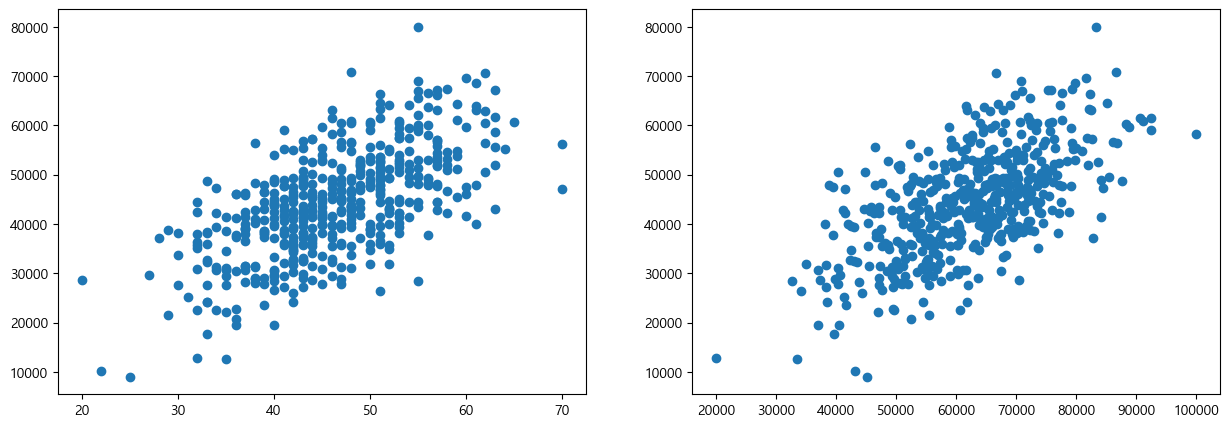

In [51]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].scatter(pre_c_df['Age'], pre_c_df['Car Purchase Amount'])
axes[1].scatter(pre_c_df['Annual Salary'], pre_c_df['Car Purchase Amount'])
plt.show()

In [52]:
pre_c_df = pre_c_df[['Annual Salary', 'Car Purchase Amount']]

pre_c_df

,Annual Salary,Car Purchase Amount
0,62812.09301,35321.45877
1,66646.89292,45115.52566
2,53798.55112,42925.70921
3,79370.03798,67422.36313
4,59729.15130,55915.46248
...,...,...
495,71942.40291,48901.44342
496,56039.49793,31491.41457
497,68888.77805,64147.28888
498,49811.99062,45442.15353


array([[<Axes: title={'center': 'Annual Salary'}>,
        <Axes: title={'center': 'Car Purchase Amount'}>]], dtype=object)

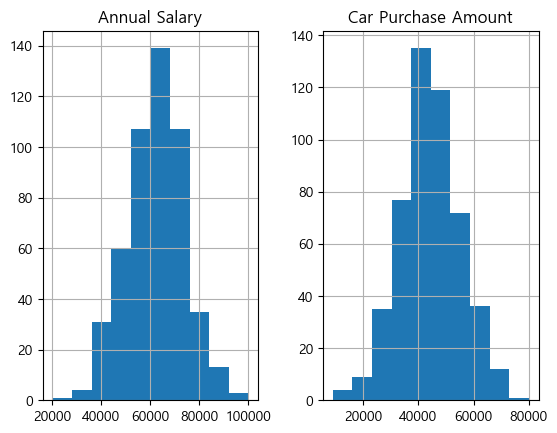

In [53]:
pre_c_df.hist()

In [55]:
from torch.nn import Module, Linear

class LinearRegressionModel(Module):
    def __init__(self):
        super().__init__()
        self.linear = Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

In [62]:
from sklearn.model_selection import train_test_split
import torch
from torch.nn.functional import mse_loss
from torch.optim import SGD

torch.manual_seed(124)

features, targets = pre_c_df.iloc[:, :-1], pre_c_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=124)

X_train = torch.FloatTensor(X_train.values)
X_test = torch.FloatTensor(X_test.values)

y_train = torch.FloatTensor(y_train.values).reshape(-1, 1)
y_test = torch.FloatTensor(y_test.values).reshape(-1, 1)

l_r = LinearRegressionModel()
# 1e-10 = 0.0000000001 (소수점 10자리)
optimizer = SGD(l_r.parameters(), lr=1e-12)

epochs = 1700

for epoch in range(1, epochs + 1):
    H = l_r(X_train)
    loss = mse_loss(H, y_train)

    optimizer.zero_grad()

    # 손실 함수 미분 후 기울기 계산
    loss.backward()

    # W, b 값 업데이트
    optimizer.step()

    # epoch 100번마다 출력
    if epoch % 100 == 0:
        W = list(l_r.parameters())[0].item()
        b = list(l_r.parameters())[1].item()
        print('{:4d}/{}: W: {:.4f}, b: {:.4f}, loss: {:.4f}' \
              .format(epoch, epochs, W, b, loss.item()))

 100/1700: W: 0.0806, b: 0.2623, loss: 1672412160.0000
 200/1700: W: 0.4270, b: 0.2623, loss: 392599872.0000
 300/1700: W: 0.5818, b: 0.2623, loss: 137090560.0000
 400/1700: W: 0.6510, b: 0.2623, loss: 86079424.0000
 500/1700: W: 0.6819, b: 0.2623, loss: 75895272.0000
 600/1700: W: 0.6957, b: 0.2623, loss: 73862072.0000
 700/1700: W: 0.7019, b: 0.2623, loss: 73456152.0000
 800/1700: W: 0.7046, b: 0.2623, loss: 73375112.0000
 900/1700: W: 0.7059, b: 0.2623, loss: 73358944.0000
1000/1700: W: 0.7064, b: 0.2623, loss: 73355704.0000
1100/1700: W: 0.7067, b: 0.2623, loss: 73355064.0000
1200/1700: W: 0.7068, b: 0.2623, loss: 73354936.0000
1300/1700: W: 0.7068, b: 0.2623, loss: 73354904.0000
1400/1700: W: 0.7068, b: 0.2623, loss: 73354896.0000
1500/1700: W: 0.7068, b: 0.2623, loss: 73354896.0000
1600/1700: W: 0.7069, b: 0.2623, loss: 73354904.0000
1700/1700: W: 0.7069, b: 0.2623, loss: 73354904.0000


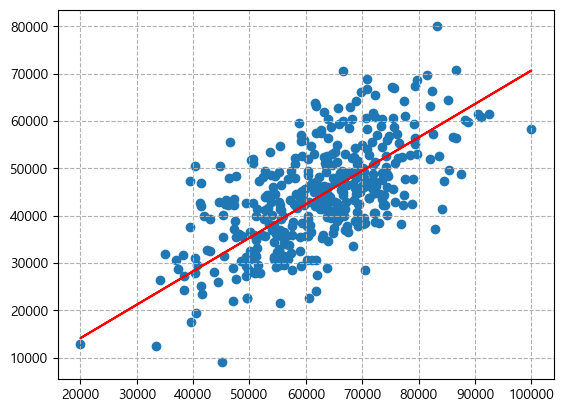

In [63]:
import matplotlib.pyplot as plt


# 폰트를 맑은 고딕으로 설정하고 한글 깨짐 방지
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

plt.scatter(X_train, y_train)
plt.plot(X_train, 0.7069 * X_train + 0.2623, color='red')
plt.grid(visible=True, linestyle='--')
plt.show()

In [68]:
H = 0.7069 * X_test + 0.2623

# RMSE (Root MSE)
print(np.sqrt(mse_loss(H, y_test).item()))

8837.719615375903


In [69]:
pre_c_df

,Annual Salary,Car Purchase Amount
0,62812.09301,35321.45877
1,66646.89292,45115.52566
2,53798.55112,42925.70921
3,79370.03798,67422.36313
4,59729.15130,55915.46248
...,...,...
495,71942.40291,48901.44342
496,56039.49793,31491.41457
497,68888.77805,64147.28888
498,49811.99062,45442.15353


#### Sklearn - Linear Regression

In [79]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

features, targets = pre_c_df.iloc[:, :-1], pre_c_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=124)

# 선형 회귀 모델에 fit
l_r = LinearRegression()
l_r.fit(X_train, y_train)

print('W: {:.4f}, b: {:.4f}'.format(l_r.coef_[0], l_r.intercept_))

W: 0.5801, b: 8166.4916


In [84]:
from sklearn.metrics import mean_squared_error

# 테스트 데이터 예측 후 loss 값 산출
prediction = l_r.predict(X_test)
print('MSE loss: {:.4f}, RMSE Loss: {:.4f}' \
      .format(mean_squared_error(y_test, prediction), \
      np.sqrt(mean_squared_error(y_test, prediction))))

MSE loss: 73836562.9597, RMSE Loss: 8592.8204
